# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url)
city_weather_json = city_weather.json()
city_weather_json

{'coord': {'lon': -130.1015, 'lat': -25.066},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 294.21,
  'feels_like': 294.51,
  'temp_min': 294.21,
  'temp_max': 294.21,
  'pressure': 1021,
  'humidity': 82,
  'sea_level': 1021,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 6.01, 'deg': 102, 'gust': 6.33},
 'clouds': {'all': 100},
 'dt': 1728832921,
 'sys': {'country': 'PN', 'sunrise': 1728828444, 'sunset': 1728873914},
 'timezone': -28800,
 'id': 4030723,
 'name': 'Adamstown',
 'cod': 200}

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | al bawiti
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tshabong
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ahoada
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | howard springs
Processing Record 22 of Set 1 | alofi
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-0.99,55,100,6.69,GL,1728833084
1,grytviken,-54.2811,-36.5092,0.04,74,25,4.88,GS,1728833363
2,al bawiti,28.3492,28.8659,33.74,20,0,4.40,EG,1728833364
3,ushuaia,-54.8000,-68.3000,10.81,54,0,5.14,AR,1728833124
4,tshabong,-26.0500,22.4500,37.49,6,6,1.26,BW,1728833367


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-0.99,55,100,6.69,GL,1728833084
1,grytviken,-54.2811,-36.5092,0.04,74,25,4.88,GS,1728833363
2,al bawiti,28.3492,28.8659,33.74,20,0,4.40,EG,1728833364
3,ushuaia,-54.8000,-68.3000,10.81,54,0,5.14,AR,1728833124
4,tshabong,-26.0500,22.4500,37.49,6,6,1.26,BW,1728833367


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

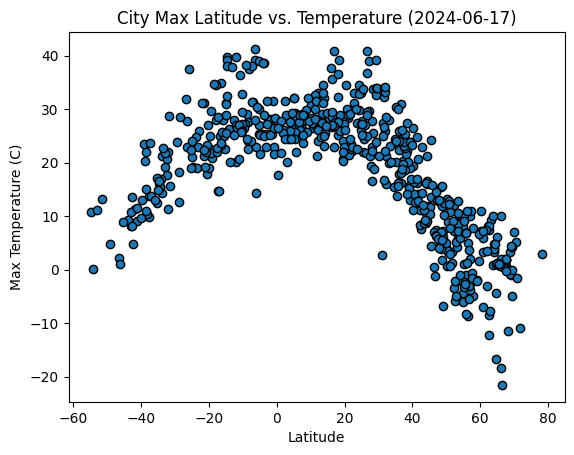

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

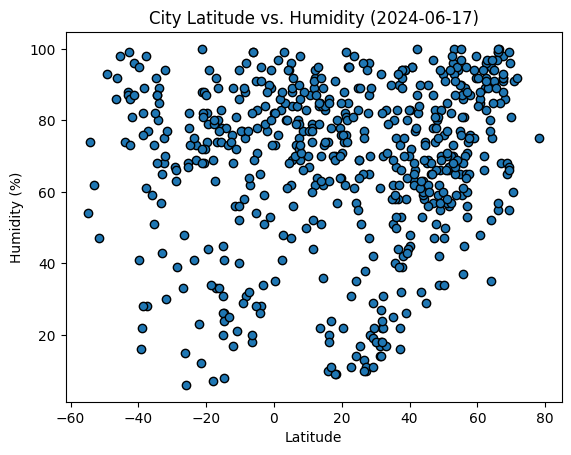

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

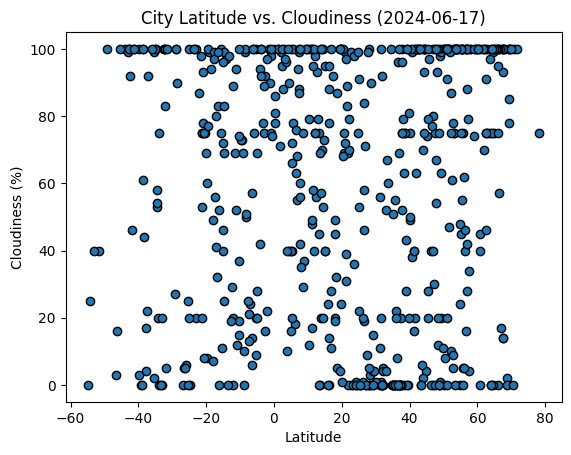

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

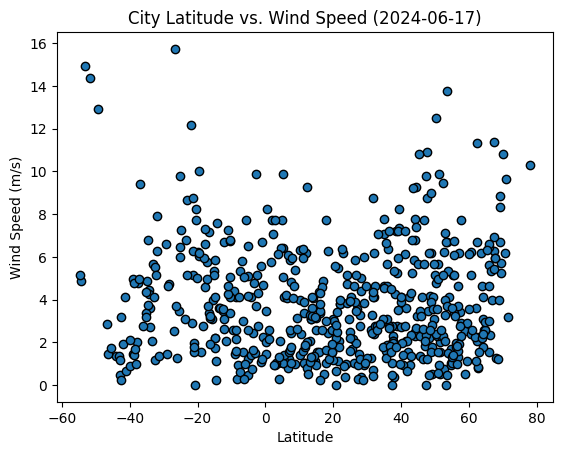

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("/Users/ahmedmansour/Desktop/datacourse/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def create_linear_regression_plot(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_line,"r-")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r^2-value is: {rvalue}")


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-0.99,55,100,6.69,GL,1728833084
2,al bawiti,28.3492,28.8659,33.74,20,0,4.40,EG,1728833364
6,iqaluit,63.7506,-68.5145,0.85,80,75,6.17,CA,1728833369
11,ribeira grande,38.5167,-28.7000,22.22,94,75,7.20,PT,1728833376
12,bethel,41.3712,-73.4140,16.12,63,40,3.60,US,1728833377


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,0.04,74,25,4.88,GS,1728833363
3,ushuaia,-54.8000,-68.3000,10.81,54,0,5.14,AR,1728833124
4,tshabong,-26.0500,22.4500,37.49,6,6,1.26,BW,1728833367
5,avarua,-21.2078,-159.7750,22.03,88,75,5.14,CK,1728833368
7,puerto natales,-51.7236,-72.4875,13.25,47,40,14.40,CL,1728833371


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.8427082913635564


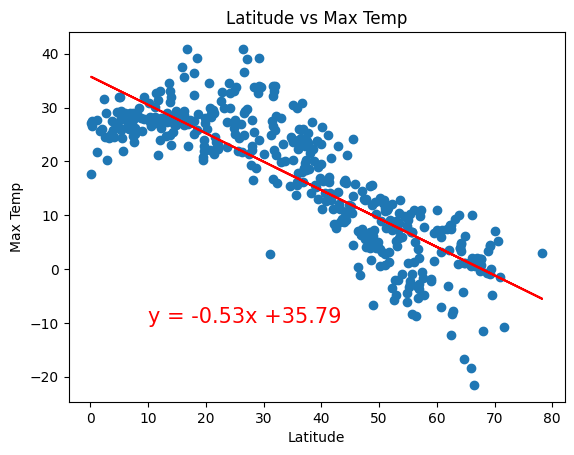

In [33]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regression_line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(northern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

The r^2-value is: 0.7365310849449116


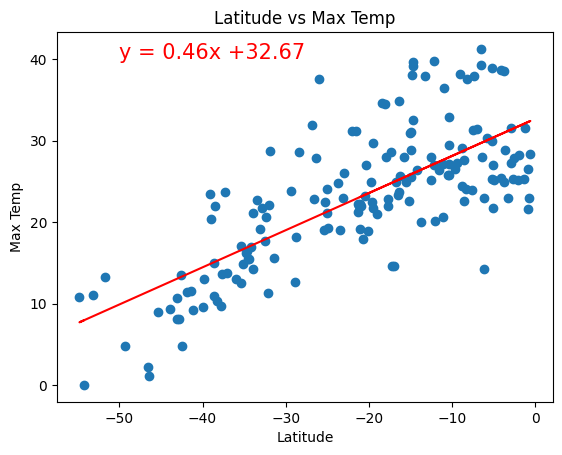

In [35]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(southern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

**Discussion about the linear relationship:** the first major observation is that both linear regressions seem to show strong correlations at -0.84 and 0.74 for Northern and Southern hemispheres respectively. As such, it can be said that there is a strong correlation in the relationship between latitude and maximum temperatures in both hemispheres. The second major observation is that the r value for the Norther hemisphere is negative while that of the Southern hemisphere is positive. This means that the relationships between latitude and maximum temperatures are as follows - as latitude increases, maximum temperature decreases in the Northern hemisphere while latitude and temperature increase together in the Southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.14153333189048595


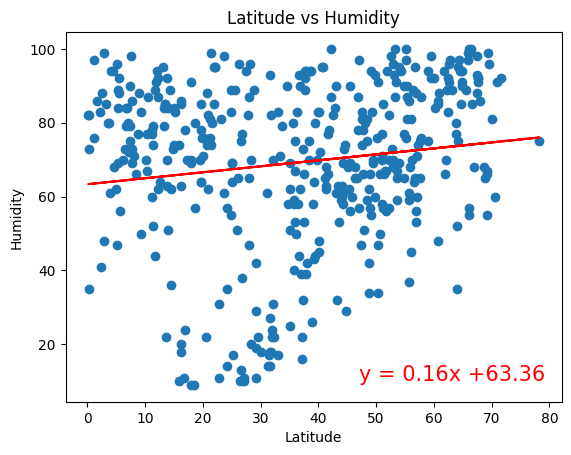

In [40]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(northern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

The r^2-value is: -0.09862998974271521


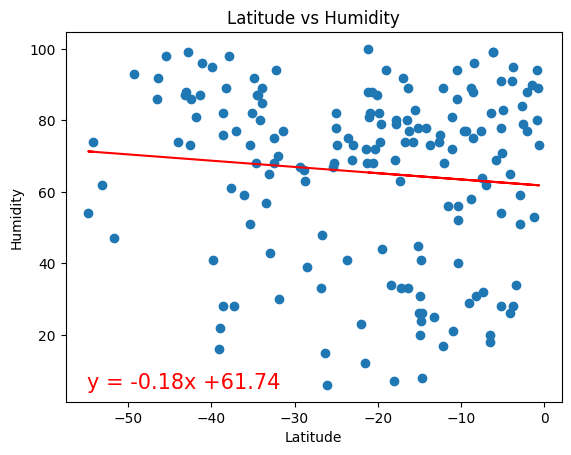

In [43]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(southern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

**Discussion about the linear relationship:** For both hemispheres, the linear regression plots produce r-values that are too small at 0.14 for Northern and -0.099 for Southern. This means that in both cases, the r-value is too low to indicate correlation, preventing us from making any certain/accurate comments about the relationships between latitude and humidity. As such, there is not a strong enough relationship to analyze how latitude changes affect changes in humidity for either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0736557097371972


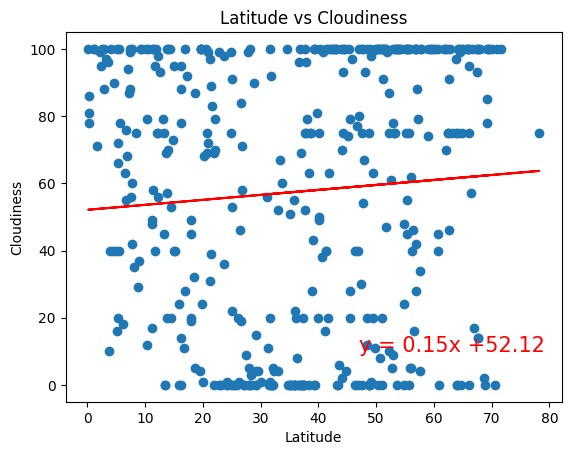

In [45]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(northern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

The r^2-value is: 0.0454761482813768


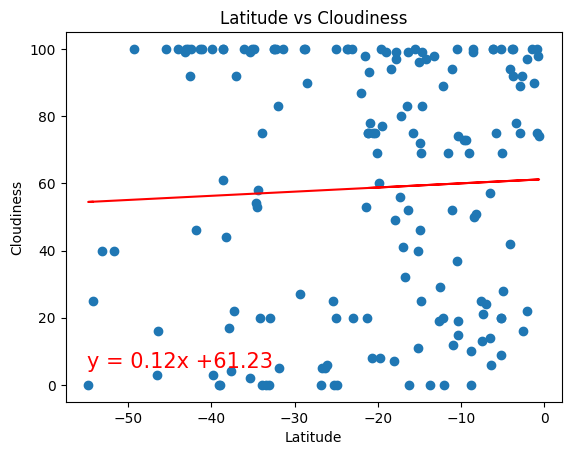

In [44]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(southern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

**Discussion about the linear relationship:** As was the case for humidity, for both hemispheres, the linear regression plots produce r-values that are too small at 0.074 for Northern and 0.045 for Southern. This means that in both cases, the r-value is too low to indicate correlation, preventing us from making any certain/accurate comments about the relationships between latitude and cloudiness. As such, there is not a strong enough relationship to analyze how latitude changes affect changes in cloudiness for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.16836988477358192


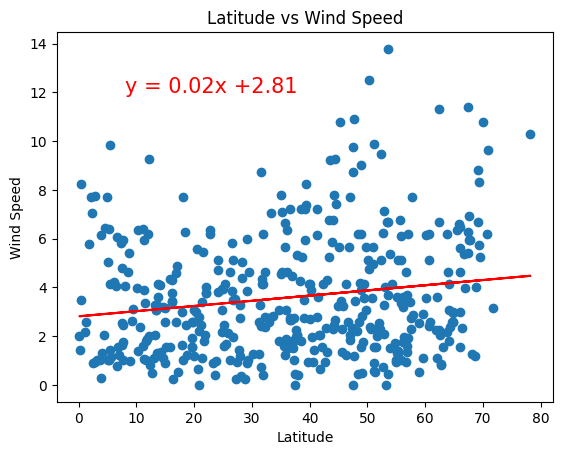

In [49]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(northern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(8,12),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

The r^2-value is: -0.11736604241872874


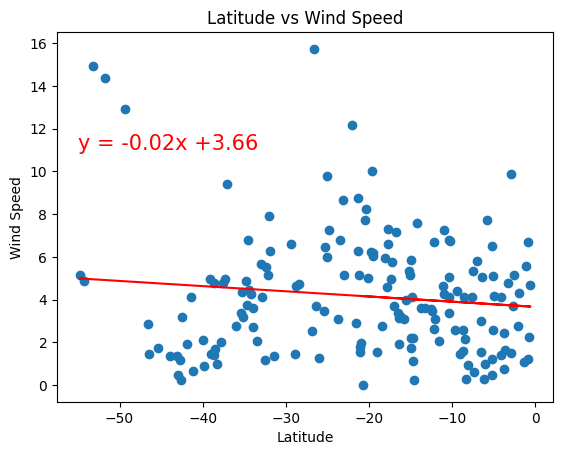

In [47]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(southern_hemi_df["Lat"],regression_line,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

**Discussion about the linear relationship:** As was the case for cloudiness and humidity, for both hemispheres, the linear regression plots produce r-values that are too small at 0.17 for Northern and -0.12 for Southern. This means that in both cases, the r-value is too low to indicate correlation, preventing us from making any certain/accurate comments about the relationships between latitude and wind speed. As such, there is not a strong enough relationship to analyze how latitude changes affect changes in wind speed for either hemisphere.